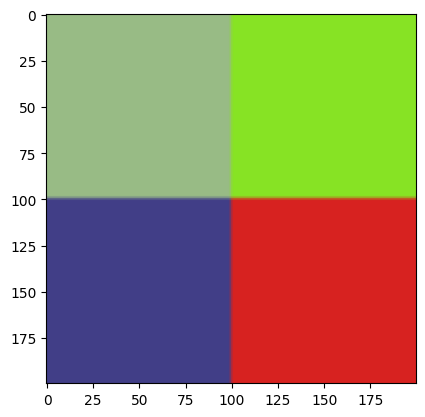

In [2]:
#task1
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
import random

r  = 0
g  = 0
b= 0

#task 1
x=[(0,50),(50,100),(0,50),(50,100)]
y=[(0,50),(0,50),(50,100),(50,100)]

img=np.zeros((100,100,3),np.uint8) #full frame in black

for i in range (4):
    #choose random color for each square
    r = random.randint(0, 255)
    g = random.randint(0, 255)
    b = random.randint(0, 255)
    img[x[i][0]:x[i][1], y[i][0]: y[i][1]] = r, g, b



img=cv.resize(img,(200,200))
plt.imshow(img)


In [ ]:
# task 2

import cv2 as cv
import matplotlib.pyplot as plt

# Read frames from any camera. Press Q to terminate the code,
# R to rotate the frame 90 degrees,
# C to save the frame on your device,
# S to save a video stream using OpenCV.
# G to convert the frame to grayscale,
# H to convert the frame to HSV space, and
# X to show (grayscale, HSV, rotated and original frames) together,
# Z to show only the original frame.

vid = cv.VideoCapture(0)
cap = 0
angle=0

r = 0
g = 0
h = 0
x = 0
s = 0
width, height = 1280, 720
saved = cv.VideoWriter("video.avi", cv.VideoWriter_fourcc(*'MJPG'), 20.0, (720, 480))

while 1:
    success, img = vid.read()
    # img = cv.resize(img,(width,height))

    if x:  # X to show (grayscale, HSV, rotated and original frames) together
        gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)  # grayscale
        hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)  # hsv
        M = cv.getRotationMatrix2D((width / 2, height / 2), angle, 1)  # rotated
        rotate = cv.warpAffine(img, M, (width, height))
        cv.imshow("GRAY", gray)
        cv.imshow("HSV", hsv)
        cv.imshow("Rotated", rotate)
    if g:  # G to convert the frame to grayscale,
        img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)  # grayscale
    if h:  # H to convert the frame to HSV space
        img = cv.cvtColor(img, cv.COLOR_BGR2HSV)
    if r >= 1:  # R to rotate the frame 90 degrees
        if r == 1:
            angle = 90
        if r == 2:
            angle = 180
        if r == 3:
            angle = 180 + 90
        if r == 4:
            angle = 0
        M = cv.getRotationMatrix2D((width / 2, height / 2), angle, 1)
        img = cv.warpAffine(img, M, (width, height))
    if s:  # S to save a video stream using OpenCV
        saved.write(img)
    cv.imshow("Task 2", img)
    input = cv.waitKey(1)

    # key pressing:

    if input == ord('c'):  # C to save the frame on your device
        cv.imwrite(f"img {cap}.png", img)
        cap += 1
    elif input == ord('s'):
        s = 1
    elif input == ord('g'):
        g, h, x = 1, 0, 0
    elif input == ord('h'):
        h, g, x = 1, 0, 0
    elif input == ord('z'):  # Z to show only the original frame.
        if x:
            cv.destroyAllWindows()
        g = h = x = r = 0
    elif input == ord('r'):
        r = r + 1
        x = 0
        if r == 4:
            r = 0

    elif input == ord('x'):
        x, h, g = 1, 0, 0
    elif input == ord('q'):
        break
if s:  # S to save a video stream using OpenCV.
    vid.release()
    saved.release()